## Оптимизаторы Keras

<img src='https://i.pinimg.com/originals/06/3c/d9/063cd923fea7ce70bdf23ab55e157741.png'>

<details>
  <summary>Оригинал </summary>
  https://i.pinimg.com/originals/06/3c/d9/063cd923fea7ce70bdf23ab55e157741.png
</details>

Сегодня обсудим:
1. Какие есть оптимизаторы?
2. Особенности SGD, Momentum, AdaGrad, RMSProp, Adam
3. Преимущества и недостатки

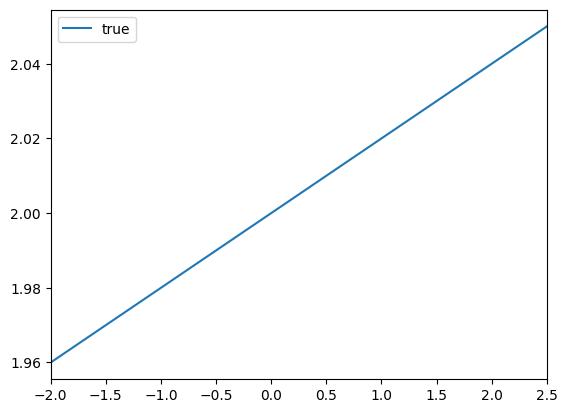

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x: 0.02 * x + 2
x = np.linspace(-2, 2.5, 10)

plt.plot(x, f(x), label='true')
plt.xlim([-2, 2.5])
plt.legend();

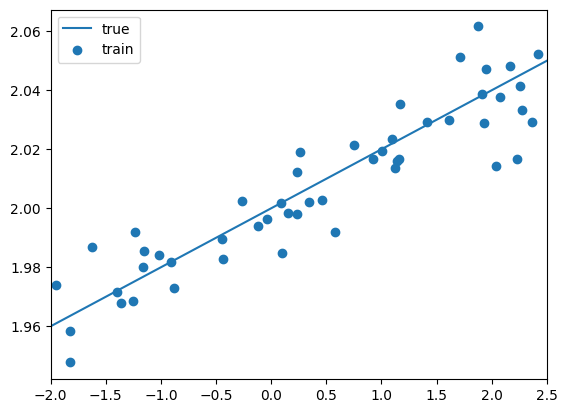

In [ ]:
n = 50
np.random.seed(9)
x_train = np.random.uniform(-2, 2.5, n)
y_train = f(x_train) + 0.01 * np.random.randn(n)

plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.xlim([-2, 2.5])
plt.legend();


Создадим сеть, она очень простая, состоит из одного слоя и одного нейрона.

<img src='https://drive.google.com/uc?id=1Qx71h2FmXS6uKHmhcIKtp49G5nqMncWK'>

In [ ]:
weight_1 = 0.5
weight_0 = -9

In [ ]:
pred = weight_0 + weight_1 * x_train

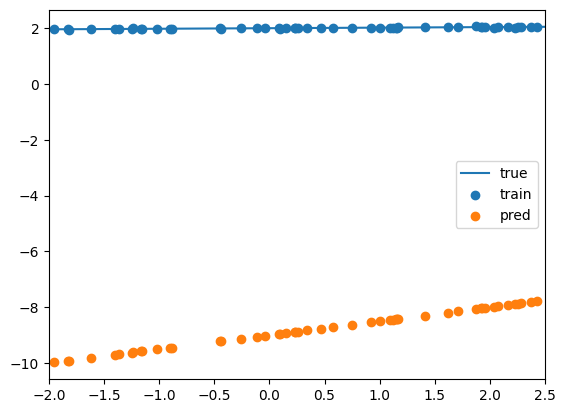

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

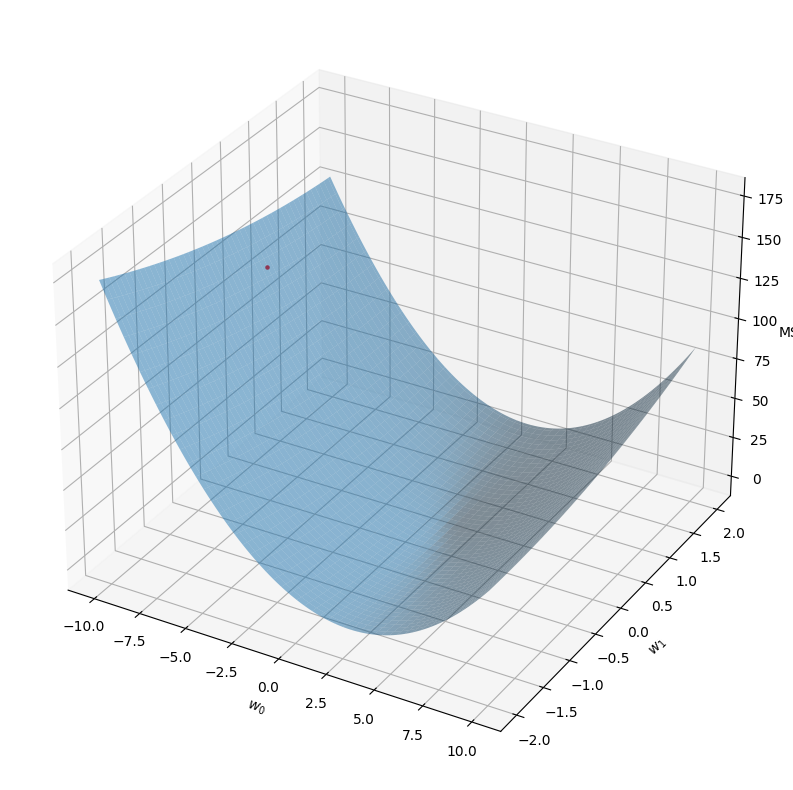

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Градиентный спуск

<img src='https://preview.redd.it/9euoe42zwj641.jpg?auto=webp&s=7a36933db5ce25bb9e1b14714519b4785203b620'>
<details>
  <summary>Оригинал </summary>
https://preview.redd.it/9euoe42zwj641.jpg?auto=webp&s=7a36933db5ce25bb9e1b14714519b4785203b620




$MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$


gr_mserror - градиент функции MSE. Распишем его отдельно для коэффициента сдвига и коэффициента наклона:

Сдвиг:
$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -1$

Наклон:
$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -X$

In [ ]:
# функция градиента MSE
def gr_mserror(X, w0, w1, y):
    y_pred = w1 * X + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X))])

#### Алгоритм градиентного спуска


1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- $ w_{k} = w_{k-1} - \eta\nabla f(X, w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


In [ ]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    grad = gr_mserror(x_train, weights_0[-1], weights_1[-1], y_train)

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

gd_weights_0 = weights_0.copy()
gd_weights_0

[-9,
 -6.842853811984711,
 -5.186920226846526,
 -3.8877066397526194,
 -2.8508643243530614,
 -2.012715297174011,
 -1.328761412918464,
 -0.766827622695394,
 -0.30290869717815705,
 0.08139613206088747,
 0.40050698988967376,
 0.665921670949684,
 0.886928461920637,
 1.0711032273217804,
 1.2246681255927316,
 1.3527587706353987,
 1.4596287175893683,
 1.5488095233060373,
 1.623238254057834,
 1.6853604209274766,
 1.7372138964686845,
 1.7804978123746948,
 1.8166294117663468,
 1.8467911287091736,
 1.8719696717090422,
 1.8929885252819012,
 1.9105350103958343,
 1.9251828333402627,
 1.9374108859364745,
 1.947618926463698,
 1.9561406623943012,
 1.9632546674750828,
 1.9691934928184769,
 1.9741512714378704,
 1.9782900657286633,
 1.9817451659121446,
 1.984629512942183,
 1.987037390625359,
 1.9890475077427099,
 1.9907255709788818,
 1.9921264327954626,
 1.9932958844769775,
 1.994272152971368,
 1.9950871504597891,
 1.9957675175051273,
 1.9963354938796372,
 1.9968096455384021,
 1.997205471502533,
 1.9975359

In [ ]:
gd_weights_1 = weights_1.copy()
gd_weights_1

[0.5,
 1.2870006637040499,
 1.57495910519973,
 1.6034755558648477,
 1.5056389389965201,
 1.3541259204955622,
 1.187545573790087,
 1.0254626826614335,
 0.87693797615654,
 0.7453603096206045,
 0.6311616808414937,
 0.5333265158331935,
 0.45021688585665304,
 0.3800118053900685,
 0.320930659647655,
 0.2713374501640942,
 0.22978058441164156,
 0.19499897335235877,
 0.16591155188852186,
 0.1415995913816614,
 0.12128680183446901,
 0.10431977451102366,
 0.09014996359634575,
 0.07831767309576142,
 0.0684381313477716,
 0.060189545766273805,
 0.05330294703423182,
 0.04755360542275573,
 0.042753804474406014,
 0.03874677362739681,
 0.03540160314706733,
 0.03260898760075537,
 0.03027766589073494,
 0.028331445583262498,
 0.026706716622605306,
 0.02535037451198361,
 0.0242180858515999,
 0.02327283998395095,
 0.022483739658879308,
 0.021824991334797914,
 0.02127506219558453,
 0.020815976376273568,
 0.020432727420473185,
 0.02011278777995507,
 0.019845699332164183,
 0.019622731535794826,
 0.01943659605328

In [ ]:
pred = weights_0[-1] + weights_1[-1] * x_train

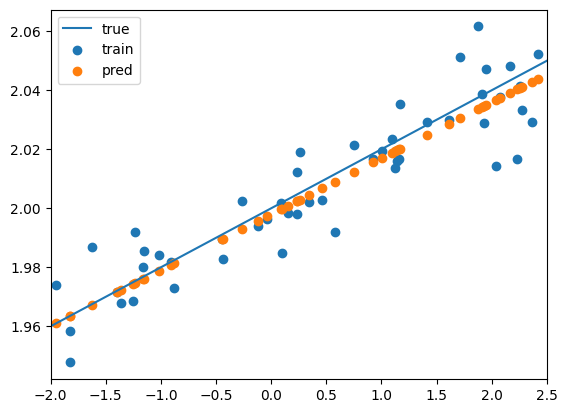

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

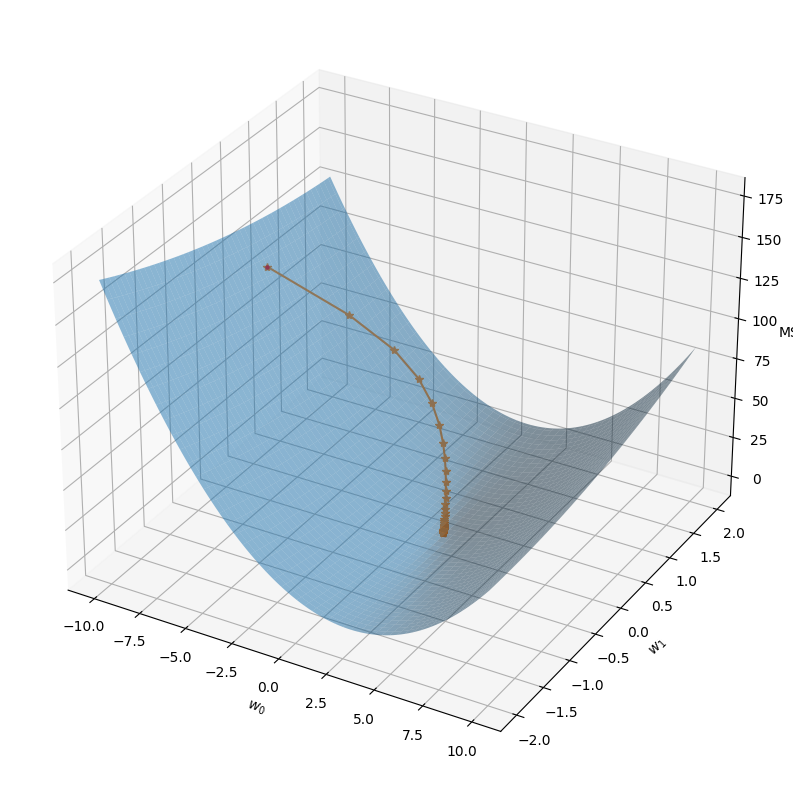

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(gd_weights_0)):
    mses.append(mse(gd_weights_0[i], gd_weights_1[i]))
ax.plot(gd_weights_0, gd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Стохастический градиентный спуск


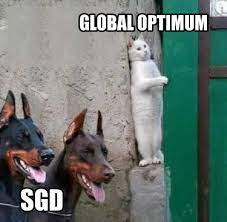

#### Алгоритм стохастического градиентного спуска


1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:
- Выбираем случайный $x_i$ из X
- $ w_{k} = w_{k-1} - \eta\nabla f(x_i, w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


In [ ]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    idx = np.random.choice(len(x_train))
    grad = gr_mserror(x_train[[idx]], weights_0[-1], weights_1[-1], y_train[[idx]])

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

sgd_weights_0 = weights_0.copy()
sgd_weights_0

[-9,
 -6.815416410593148,
 -4.980536379756948,
 -3.5866032980529265,
 -3.002447160986093,
 -1.747323831322639,
 -0.16336222495578712,
 0.49069109347250706,
 0.8130549934190352,
 0.9633131257256021,
 1.418790076701028,
 1.6210752876881278,
 1.768515873589087,
 1.788742795866886,
 1.7815400363102492,
 1.8272051585625677,
 1.8449508043395622,
 1.8203504360142844,
 1.8723796944485807,
 1.8946447741692718,
 1.9257743212086396,
 1.9312552234392577,
 1.945102728671552,
 1.9503836360570612,
 1.951627881458415,
 1.9610808761710554,
 1.9616511522898903,
 1.9671228475706528,
 1.96975907699054,
 1.9641764633380803,
 1.9807404648249591,
 1.9756754514266308,
 1.981069802099281,
 1.9879720380891166,
 1.9926413222086434,
 1.992217674401825,
 1.992463258273335,
 1.9947592009116824,
 1.9935504059561269,
 1.9922263876077206,
 1.9930471802194953,
 1.9932506004010762,
 1.9930122361868012,
 1.9943633113398167,
 1.996481698179865,
 1.99470349379179,
 1.9971165253365721,
 1.9951195066393057,
 2.00076161306619

In [ ]:
sgd_weights_1 = weights_1.copy()
sgd_weights_1

[0.5,
 0.8296166588109013,
 0.012625096031446792,
 -1.9357687326131874,
 -2.730513224536114,
 -2.14654196318567,
 0.9109851350634179,
 0.09374130118848345,
 -0.3568483587296363,
 -0.5319084602957519,
 0.4951138935566394,
 0.31184764712013824,
 0.12761968543038102,
 0.15079939978824208,
 0.1367286945792585,
 0.13139897259434485,
 0.14164564865111734,
 0.0861760400815592,
 0.02555870692228425,
 0.0757626404791526,
 0.047559910228460914,
 0.05642159170956125,
 0.05480540523216671,
 0.060962316305468486,
 0.06168076745247203,
 0.061302643801931775,
 0.061967518054513594,
 0.06279310418691059,
 0.06370229015685304,
 0.057421994666994707,
 0.038123899195408914,
 0.028346884616182365,
 0.037581565723506974,
 0.028957177399634743,
 0.02043278145227205,
 0.019956188663287147,
 0.020012913581503332,
 0.025580842225460136,
 0.023626427528505214,
 0.022136941244903605,
 0.022894477080803007,
 0.022964632877450014,
 0.022853729153822885,
 0.022252154673669214,
 0.023835479013617402,
 0.019825933300

In [ ]:
pred = weights_0[-1] + weights_1[-1] * x_train

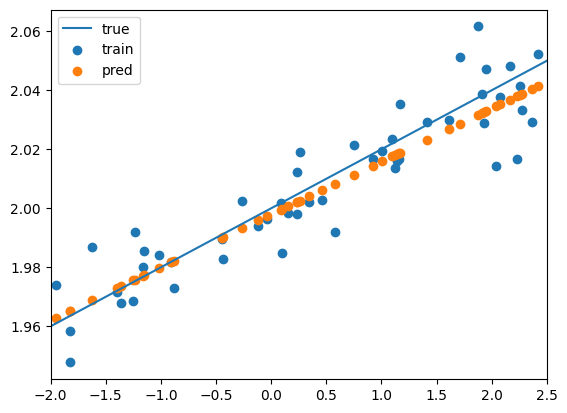

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

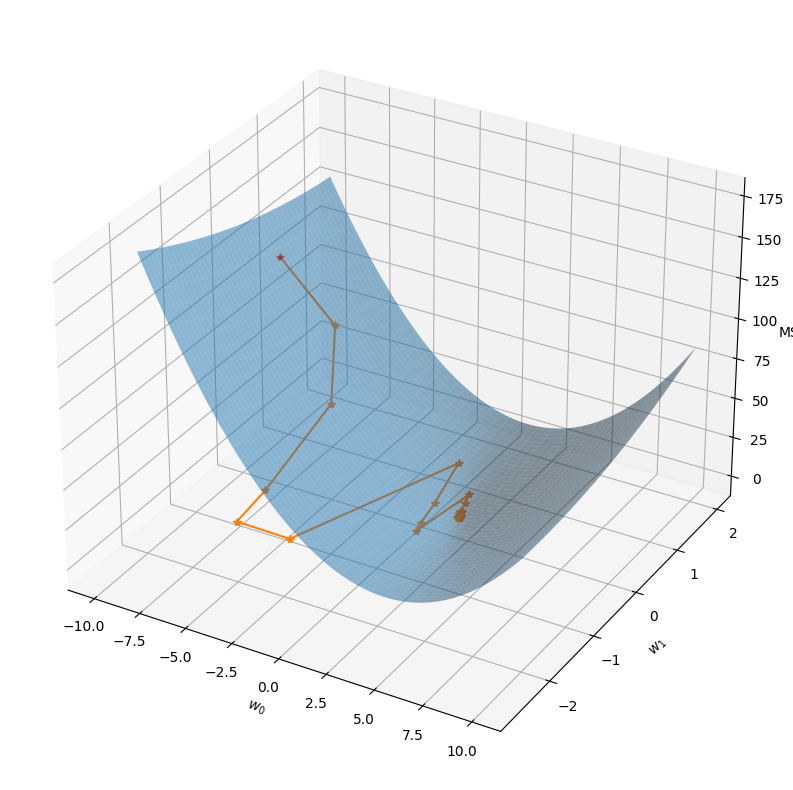

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(sgd_weights_0)):
    mses.append(mse(sgd_weights_0[i], sgd_weights_1[i]))
ax.plot(sgd_weights_0, sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Mini-Batch стохастический градиентный спуск

#### Алгоритм mini-batch стохастического градиентного спуска


1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:
- Выбираем случайные $x_i$ из X
- $ w_{k} = w_{k-1} - \eta\nabla f(x_i, w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


In [ ]:
k = 50
lr = 0.1
amount = 10

weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

mb_sgd_weights_0 = weights_0.copy()
mb_sgd_weights_0

[-9,
 -6.8631444974880935,
 -5.243532234948031,
 -3.964728683106543,
 -2.761860290490796,
 -1.9602405553175857,
 -1.2614713382579539,
 -0.7051494542787037,
 -0.19130826145581192,
 0.19735493655901348,
 0.4540554872330744,
 0.6954939923074622,
 0.8835714149963764,
 1.0821488249225226,
 1.2715886813242168,
 1.4094460803378102,
 1.5009043928667811,
 1.5824925765190607,
 1.6626290845385507,
 1.70463655505107,
 1.7593113901446469,
 1.8011504276870667,
 1.8351090976818951,
 1.8661914272992615,
 1.8827243218591394,
 1.8994988561775148,
 1.9206850461982232,
 1.9361346260244483,
 1.9475967012787039,
 1.9540227080228576,
 1.9618861035243298,
 1.967859645399778,
 1.9726040876943685,
 1.9766333169463282,
 1.9809981307993545,
 1.9825834901555675,
 1.9856081980924998,
 1.9879306480178538,
 1.9894093752182007,
 1.990551912784717,
 1.9926676698658474,
 1.9942010124225167,
 1.9943086689211535,
 1.9955314793568,
 1.9959728692024066,
 1.9965698724824357,
 1.9976744631148666,
 1.9981875347635751,
 1.99910

In [ ]:
mb_sgd_weights_1 = weights_1.copy()
mb_sgd_weights_1

[0.5,
 1.7246898086829847,
 1.8056945571548562,
 1.4759660011336715,
 0.886515113634535,
 1.2686793523927706,
 1.0185716918578627,
 0.8483567745159718,
 0.6578165049752246,
 0.6745992441640802,
 0.6728158989669826,
 0.5862939750549395,
 0.4646264444928448,
 0.36896555329415204,
 0.23081973094765385,
 0.1740570282212759,
 0.2191683792369032,
 0.17587710234306747,
 0.13478559202490523,
 0.14882521450432554,
 0.10185951769524165,
 0.09260767126628092,
 0.08344085064567047,
 0.0684160306793663,
 0.0732082025007851,
 0.06179484804089026,
 0.044584214228515745,
 0.03506409078807804,
 0.030187867876028424,
 0.03786077062733323,
 0.033328915877003706,
 0.03257680162944758,
 0.032352499359692914,
 0.028800714568742836,
 0.02794820782357884,
 0.026276034837825542,
 0.023972710962987552,
 0.024853920315041442,
 0.024939791802586937,
 0.023582309628305605,
 0.021309115618060377,
 0.02102568220855628,
 0.020140553539480407,
 0.02023144049430441,
 0.021011469719192762,
 0.01836780002731785,
 0.01906

In [ ]:
pred = weights_0[-1] + weights_1[-1] * x_train

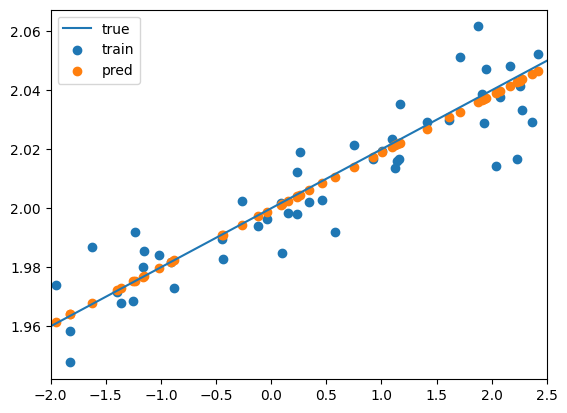

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

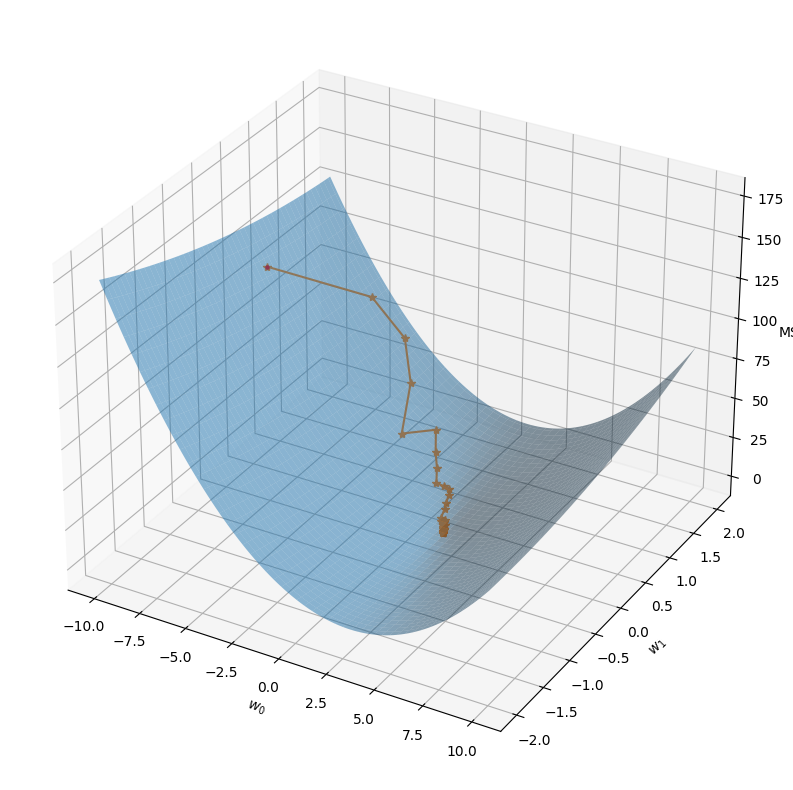

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(mb_sgd_weights_0)):
    mses.append(mse(mb_sgd_weights_0[i], mb_sgd_weights_1[i]))
ax.plot(mb_sgd_weights_0, mb_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

<img src='https://ml-explained.com/_ipx/sizes_xs:320px%20md:768px%20lg:1024px,w_1536,f_png/articles/gradient-descent-explained/variations_comparison.png'>

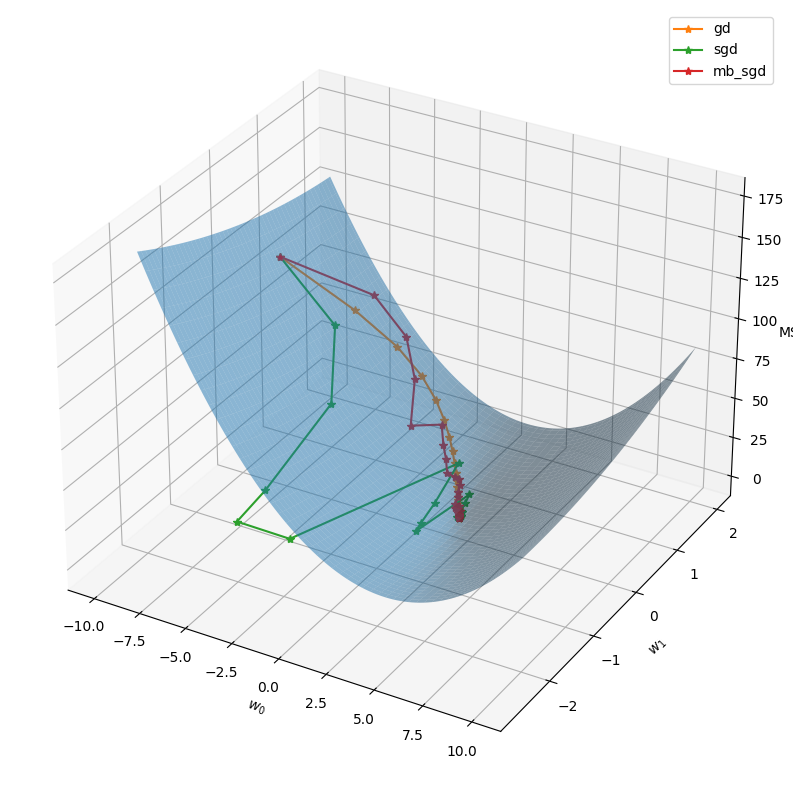

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(gd_weights_0)):
    mses.append(mse(gd_weights_0[i], gd_weights_1[i]))
ax.plot(gd_weights_0, gd_weights_1, mses, marker='*', label='gd')

mses = []
for i in range(len(sgd_weights_0)):
    mses.append(mse(sgd_weights_0[i], sgd_weights_1[i]))
ax.plot(sgd_weights_0, sgd_weights_1, mses, marker='*', label='sgd')

mses = []
for i in range(len(mb_sgd_weights_0)):
    mses.append(mse(mb_sgd_weights_0[i], mb_sgd_weights_1[i]))
ax.plot(mb_sgd_weights_0, mb_sgd_weights_1, mses, marker='*', label='mb_sgd')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.legend()
plt.show()

### Стохастический градиентный спуск + Momentum



<img src='https://drive.google.com/uc?export=view&id=1JMoY1y1oZUtiicvCuhxhliiLBLoNl7bA'>

Правило обновления весов w с градиентом g, когда импульс == 0:

$w^{k} = w^{k-1} - \eta * {\nabla Q(w^{k-1}, X)}$

Правило обновления весов w с градиентом g, когда импульс > 0:

$velocity = momentum * velocity - \eta * {\nabla Q(w^{k-1}, X)}$<br>
$w^{k} = w^{k-1} + velocity$

<img src='https://drive.google.com/uc?export=view&id=1h0u3hNo2cjDRoq0FVdXIScgRo6Iq687y'>

Засчет добавления импульса получается сглаживание оптимизации.

|$t_1$|$t_2$|..|$t_n$|
|--|--|--|--|
|$g_1$|$g_2$|..|$g_n$|

$\gamma = 0.5$

$v_1 = g_1$<br>
$v_2 = \gamma * v_1 + g_2 = 0.5 * g_1 + g_2$<br>
$v_3 = \gamma * v_2 + g_3 = \gamma (\gamma * v_1 + g_2) + g_3 = \gamma^2 * g_1 + \gamma * g_2 + g_3 = 0.25 * g_1 + 0.5 * g_2 + g_3$<br>


#### Алгоритм

1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- Выбираем случайные $x_i$ из X
- $velocity = momentum * velocity - \eta\nabla f(x_i, w_{k-1}) $

- $ w_{k} = w_{k-1} +  velocity $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


In [ ]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

velocity = [0, 0]
momentum = 0.5
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    velocity[0] = momentum * velocity[0] - lr * grad[0]
    velocity[1] = momentum * velocity[1] - lr * grad[1]

    new_w_0 = weights_0[-1] + velocity[0]
    new_w_1 = weights_1[-1] + velocity[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

momentum_sgd_weights_0 = weights_0.copy()
momentum_sgd_weights_0

[-9,
 -6.80285136109089,
 -3.9715915774580517,
 -1.417504885563678,
 0.3465286892411563,
 1.4512964697568411,
 2.125852394758322,
 2.3937708226452443,
 2.45038378575563,
 2.4002146678710354,
 2.327413294780666,
 2.241675262348407,
 2.160083930519824,
 2.083319928150862,
 2.0258768999052634,
 1.9905053836829067,
 1.9667361981046803,
 1.9598221093015065,
 1.9635721447012142,
 1.974223700360884,
 1.985603309484002,
 1.9940891057665764,
 1.9993422120413833,
 2.0014724400912556,
 2.001862689754177,
 2.001845318247777,
 2.001608318552937,
 2.000392954356415,
 1.9992092827544294,
 1.99855265837311,
 1.9983659689574171,
 1.9990029617912928,
 1.998700247586428,
 1.9992064263409701,
 1.9986408010455081,
 1.9983736437335389,
 1.99835531952432,
 1.9983547117417988,
 1.998203359484949,
 1.9990087486040924,
 1.9992881018795838,
 1.9998030104881015,
 1.9991263192673352,
 1.999505620808297,
 1.999044780768468,
 1.9990118583555525,
 1.9994584804870885,
 1.9999445993098028,
 2.0000576558446626,
 2.00073

In [ ]:
momentum_sgd_weights_1 = weights_1.copy()
momentum_sgd_weights_1

[0.5,
 0.4672498718037054,
 0.9018523191177299,
 1.264985861582988,
 1.2688048210174367,
 1.0366098412983347,
 0.4635191888457091,
 -0.006671446130697367,
 -0.2522792197845646,
 -0.33454142798701053,
 -0.2728555896999175,
 -0.15280727161966903,
 -0.04515048032694498,
 0.0428326883778332,
 0.07229927302111,
 0.06701849638696215,
 0.04365330846446977,
 0.020763894150583787,
 0.008860329849622942,
 0.011017307708050407,
 0.018708565580399295,
 0.022096916464598732,
 0.02216320739709747,
 0.021170060897334444,
 0.01809667157632993,
 0.01665491004942651,
 0.017401189146869448,
 0.0179324730970616,
 0.017919534915551982,
 0.017842850187316205,
 0.01822800952032759,
 0.020089065716669026,
 0.020382313486042195,
 0.021144233687350876,
 0.01795561363089829,
 0.01678246044469759,
 0.017633754236204176,
 0.0176739997328619,
 0.016780744293815233,
 0.01881445246940256,
 0.02058295813196761,
 0.019985036703328917,
 0.017005277384586723,
 0.01748201668385021,
 0.018483762157838163,
 0.02041796719819

In [ ]:
pred = weights_0[-1] + weights_1[-1] * x_train

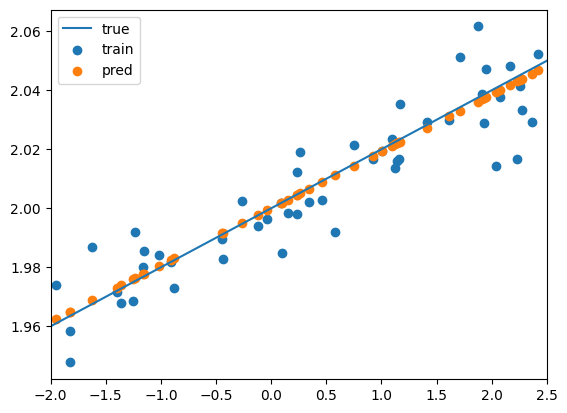

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

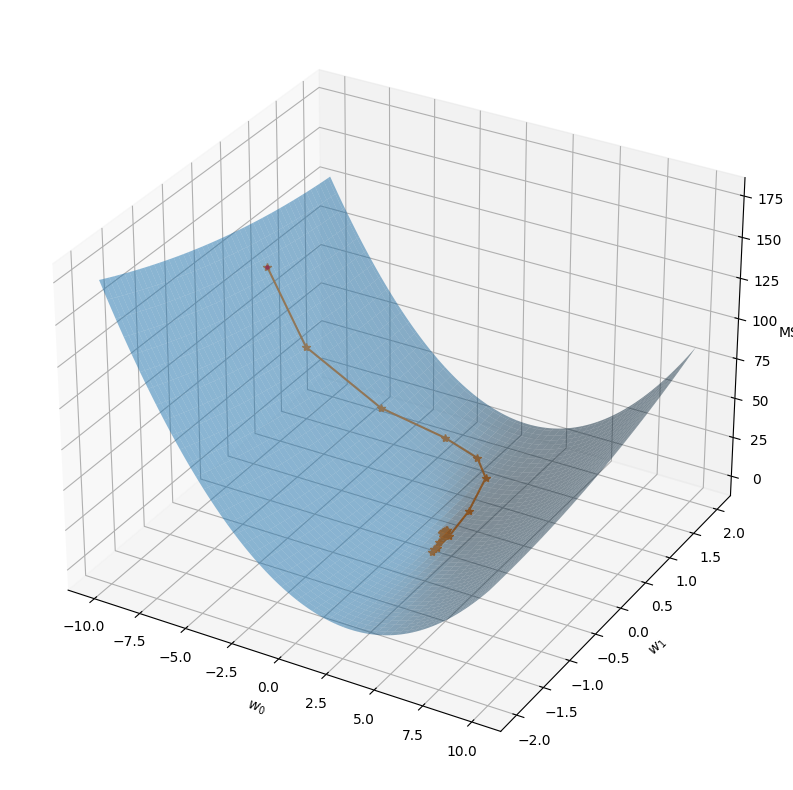

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(momentum_sgd_weights_0)):
    mses.append(mse(momentum_sgd_weights_0[i], momentum_sgd_weights_1[i]))
ax.plot(momentum_sgd_weights_0, momentum_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

#### Эксперименты с моментумом

In [ ]:
k = 50
lr = 0.1


momentum_sgd_weights_0_exp = []
momentum_sgd_weights_1_exp = []
momentums = np.linspace(0, 0.8, 5)

for momentum in momentums:
    weights_0, weights_1 = [weight_0], [weight_1]
    velocity = [0, 0]

    for i in range(k):
        idx = np.random.choice(len(x_train), size=amount, replace=False)
        grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

        velocity[0] = momentum * velocity[0] - lr * grad[0]
        velocity[1] = momentum * velocity[1] - lr * grad[1]

        new_w_0 = weights_0[-1] + velocity[0]
        new_w_1 = weights_1[-1] + velocity[1]

        weights_0.append(new_w_0)
        weights_1.append(new_w_1)

    momentum_sgd_weights_0_exp.append(weights_0)
    momentum_sgd_weights_1_exp.append(weights_1)

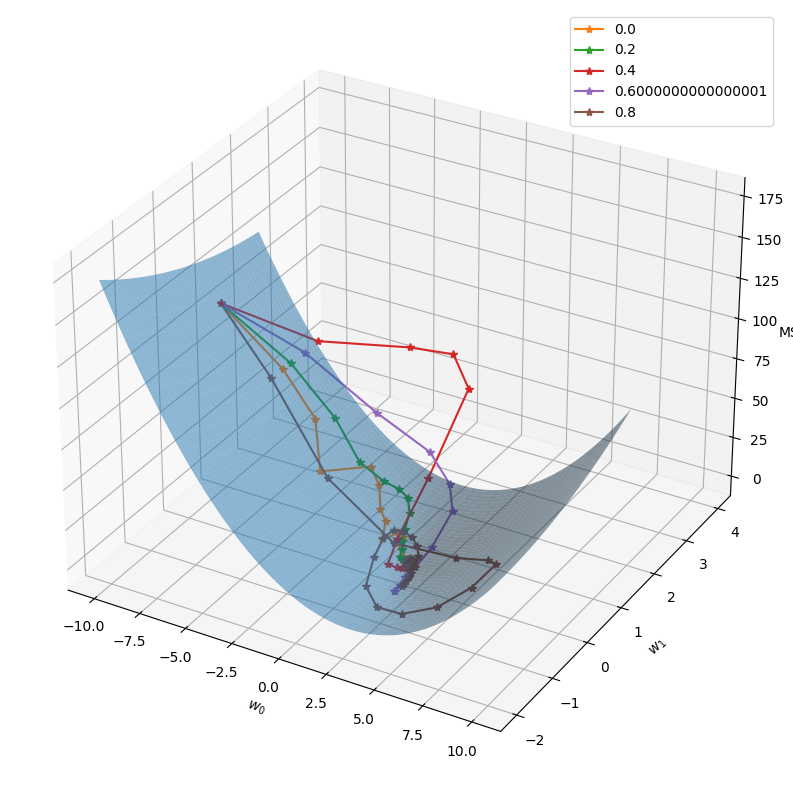

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

for j, (weights_0, weights_1) in enumerate(zip(momentum_sgd_weights_0_exp, momentum_sgd_weights_1_exp)):
    mses = []
    for i in range(len(weights_0)):
        mses.append(mse(weights_0[i], weights_1[i]))
    ax.plot(weights_0, weights_1, mses, marker='*', label=momentums[j])

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')
plt.legend()
plt.show()

In [ ]:
from keras.optimizers import SGD
SGD(momentum=0.5)

### AdaGrad (Adaptive Gradient Descent)


Gradient Descent:
$ w^{k} = w^{k-1} - \eta\nabla Q(w^{k-1}, X)$.

В Adagrad используются разные скорости обучения в зависимости от итерации:
<h3>$ w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X) $</h3>

<h2>$\eta_{k} = \frac{\eta}{\sqrt{\alpha_k + \epsilon}}$</h2>
где  $\epsilon$ - маленькое число, чтобы не было деления на ноль.
<h4>$\alpha_k = \sum_{i=0}^k{\nabla Q(w^{k-1}, X)}^2$</h4>

Обновление весов:

<h4>$ w^{k} = w^{k-1} - \eta_k\nabla Q(w^{k-1}, X)$</h4>

Получается, что когда $\alpha$ становится большим числом, то $\eta_{k}$ становится меньше, то есть с увеличением итерации - уменьшается скорость обучения, а значит и уменьшается скорость изменения весов.

Но есть одна очень большая проблема - чем больше итераций, тем $\alpha$ больше, скорость обучения меньше, это приведет к тому, что изменение весов может стать совсем незаметным. Но это решаемо с помощью RMSProp.

#### Алгоритм

1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- Выбираем случайные $x_i$ из X
- $\alpha_k = \sum{\nabla f(x_i, w_{k-1})^2}$
- $\eta_k = \frac{\eta}{\sqrt{\alpha_k + ϵ}} $
- $ w_{k} = w_{k-1} - \eta_k\nabla f(x_i, w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


In [ ]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

alphas = [0, 0]
eps = 10e-7
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    alphas[0] += grad[0] ** 2
    alphas[1] += grad[1] ** 2

    lr_k_0 = lr / np.sqrt(alphas[0] + eps)
    lr_k_1 = lr / np.sqrt(alphas[1] + eps)

    new_w_0 = weights_0[-1] - lr_k_0 * grad[0]
    new_w_1 = weights_1[-1] - lr_k_1 * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

adagrad_sgd_weights_0 = weights_0.copy()
adagrad_sgd_weights_0

[-9,
 -8.900000000106465,
 -8.828674530977311,
 -8.772912319853328,
 -8.724052629025376,
 -8.680085706159819,
 -8.640679599278325,
 -8.602560903563177,
 -8.56846841722677,
 -8.535995733030907,
 -8.505768555424012,
 -8.47601196189191,
 -8.44908430845136,
 -8.422161498568109,
 -8.396182084037438,
 -8.371089486742413,
 -8.34667314767776,
 -8.323029934410043,
 -8.30007459177624,
 -8.277615027937099,
 -8.25712750188302,
 -8.235417661017081,
 -8.214174221835103,
 -8.194186094656905,
 -8.174324963665413,
 -8.154628462641003,
 -8.135545552075088,
 -8.117207883475658,
 -8.09924918484617,
 -8.081695557269649,
 -8.063388600159007,
 -8.046164872840082,
 -8.029509857712252,
 -8.012407349526791,
 -7.996808235046855,
 -7.979743151229254,
 -7.963912130799331,
 -7.947398797506123,
 -7.931579170840953,
 -7.915332851137641,
 -7.899653892274385,
 -7.883498034416462,
 -7.869826789739126,
 -7.8558477456182745,
 -7.842075763679398,
 -7.827867554996906,
 -7.8146570561768645,
 -7.80036292719986,
 -7.7872116327

In [ ]:
adagrad_sgd_weights_1 = weights_1.copy()
adagrad_sgd_weights_1

[0.5,
 0.5999999985222574,
 0.5231895200955144,
 0.6105186958612369,
 0.6569796791704223,
 0.6850533356816395,
 0.7344869749457773,
 0.7222647145791192,
 0.7613001217187481,
 0.7916274927843474,
 0.830670537492182,
 0.8385782085585843,
 0.8850908320327083,
 0.9053871567965301,
 0.9211217510585559,
 0.9356650744073378,
 0.9437256877893806,
 0.9548059723381694,
 0.9687791931401323,
 0.971119533693308,
 1.0105594839715333,
 1.0089863537553097,
 1.0050817279595063,
 1.0222966190139176,
 1.0290536558003076,
 1.0311384590897763,
 1.034918178939386,
 1.0472739939019131,
 1.0602900754191864,
 1.0769021970673984,
 1.0660870404806895,
 1.074029376677092,
 1.0880661230334585,
 1.0814069553286938,
 1.1088096179169067,
 1.091744445241009,
 1.1016801506357345,
 1.0897688979471132,
 1.08906448536231,
 1.0754380874975162,
 1.070226925322813,
 1.047445996609862,
 1.0772906012902645,
 1.0929751072913994,
 1.1121906410627997,
 1.1185518318379897,
 1.1383975573575869,
 1.133688958477775,
 1.14873446364473

In [ ]:
pred = weights_0[-1] + weights_1[-1] * x_train

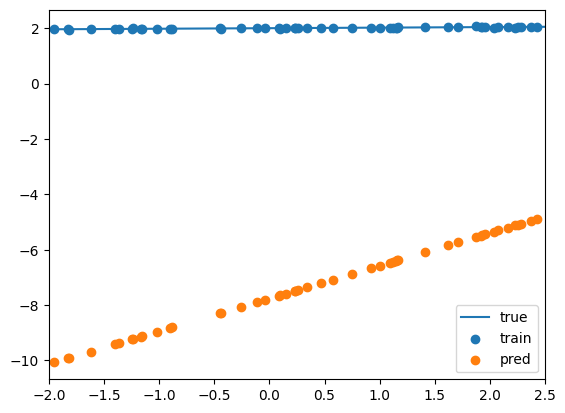

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

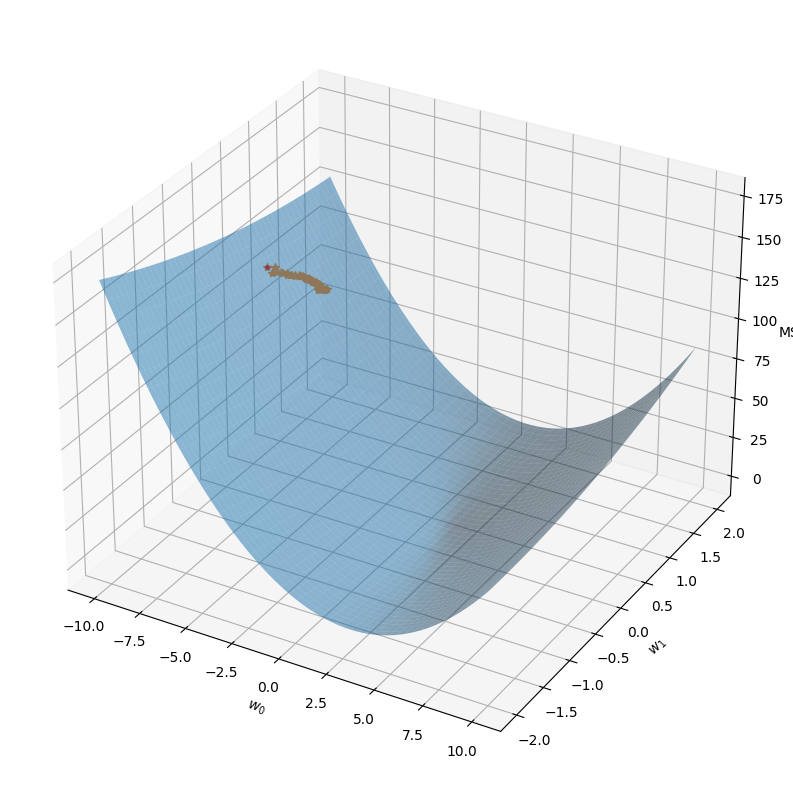

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(adagrad_sgd_weights_0)):
    mses.append(mse(adagrad_sgd_weights_0[i], adagrad_sgd_weights_1[i]))
ax.plot(adagrad_sgd_weights_0, adagrad_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

In [ ]:
from keras.optimizers import Adagrad
Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvQbsQMkqBQeCk8UN_eY5K_yQhUwuWDLUO820L-B5Y8ONYYFgZIR3gUX3n_dYeRM38Zc8&usqp=CAU'>

<details>
  <summary>Оригинал </summary>
  
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvQbsQMkqBQeCk8UN_eY5K_yQhUwuWDLUO820L-B5Y8ONYYFgZIR3gUX3n_dYeRM38Zc8&usqp=CAU
</details>

### RMS-Prop (Root Mean Square Propagation)

Этот оптимизатор исправляет проблему с неизменяемыми весами в Adagrad засчет введения ограничения на градиенты весов.

<h2>$\eta_{k} = \frac{\eta}{\sqrt{W_{avg_k} + \epsilon}}$</h2>
где  $\epsilon$ - маленькое число, чтобы не было деления на ноль.

$W_{avg_{0}} = 0$

<h4>$W_{avg_k} = \rho * W_{avg_{k-1}}+(1-\rho){\nabla Q(w^{k-1}, X)}^2$</h4>

Обновление весов:

<h4>$ w^{k} = w^{k-1} - \eta_k\nabla Q(w^{k-1}, X)$</h4>


#### Алгоритм

1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- Выбираем случайные $x_i$ из X
- $\alpha_{avg_k} = ρ ⋅ \alpha_{avg_{k-1}} + (1 - \rho) \nabla f(x_i, w_{k-1})^2$
- $\eta_k = \frac{\eta}{\sqrt{\alpha_{avg_k} + ϵ}} $
- $ w_{k} = w_{k-1} - \eta_k\nabla f(x_i, w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


In [ ]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

alphas = [0, 0]
eps = 10e-7
rho = 0.9
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    alphas[0] = rho * alphas[0] + (1 - rho) * grad[0] ** 2
    alphas[1] = rho * alphas[1] + (1 - rho) * grad[1] ** 2

    lr_k_0 = lr / np.sqrt(alphas[0] + eps)
    lr_k_1 = lr / np.sqrt(alphas[1] + eps)

    new_w_0 = weights_0[-1] - lr_k_0 * grad[0]
    new_w_1 = weights_1[-1] - lr_k_1 * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

rmsprop_sgd_weights_0 = weights_0.copy()
rmsprop_sgd_weights_0

[-9,
 -8.683772237388066,
 -8.460646721673141,
 -8.272802871111313,
 -8.113505217057588,
 -7.9643281201833815,
 -7.820845027292763,
 -7.69043816451011,
 -7.573133501361961,
 -7.44858892709658,
 -7.32092823864745,
 -7.213574221153117,
 -7.104420270505712,
 -7.003162472930249,
 -6.895085917451976,
 -6.788407967647309,
 -6.675014389785166,
 -6.575564920847412,
 -6.4652692460560015,
 -6.3601262715436455,
 -6.263040676473646,
 -6.174841766282016,
 -6.079061425857871,
 -5.987643484085229,
 -5.89978221100363,
 -5.806316476267941,
 -5.719357055659176,
 -5.624384180699591,
 -5.550164788879926,
 -5.459051206987965,
 -5.376756081366612,
 -5.298435770329804,
 -5.20068781186479,
 -5.0938885743112055,
 -5.020422553452417,
 -4.926223350034494,
 -4.850018636836621,
 -4.766418258579878,
 -4.662381455749497,
 -4.565412554116708,
 -4.4772630714441,
 -4.391127128095606,
 -4.301603890447553,
 -4.21185627562441,
 -4.119089868049435,
 -4.03398523808299,
 -3.9367708244973,
 -3.854780471323472,
 -3.75367861663

In [ ]:
rmsprop_sgd_weights_1 = weights_1.copy()
rmsprop_sgd_weights_1

[0.5,
 0.8162277447673025,
 1.0719439257717043,
 1.1205652610892323,
 1.3518954585751395,
 1.4371019724243128,
 1.4406774781947702,
 1.4841900903948309,
 1.6652753601498975,
 1.635324408054,
 1.487415605039805,
 1.5860197390031312,
 1.572890317690054,
 1.6897678844809345,
 1.6850334952869501,
 1.639596728517139,
 1.4438599783621202,
 1.4257253205310063,
 1.2643737399541404,
 1.167223954037287,
 1.2077765016294373,
 1.326543943148161,
 1.332629326825245,
 1.3932458463958826,
 1.4870615894586807,
 1.4914921198519917,
 1.5883241341706833,
 1.5221396977430792,
 1.6965748866571682,
 1.6737806081445055,
 1.7653088789865397,
 1.865078141682639,
 1.8205443376412356,
 1.6702423402056208,
 1.7805347126782531,
 1.7230225984166943,
 1.7931162681066137,
 1.8036275066507657,
 1.6448962838803567,
 1.6063007531654607,
 1.5983758096737055,
 1.627605549286531,
 1.6275179800012638,
 1.6310993426778375,
 1.5431540002261732,
 1.499776668204413,
 1.3578702838653798,
 1.397983497074525,
 1.2503075053479518,


In [ ]:
pred = weights_0[-1] + weights_1[-1] * x_train

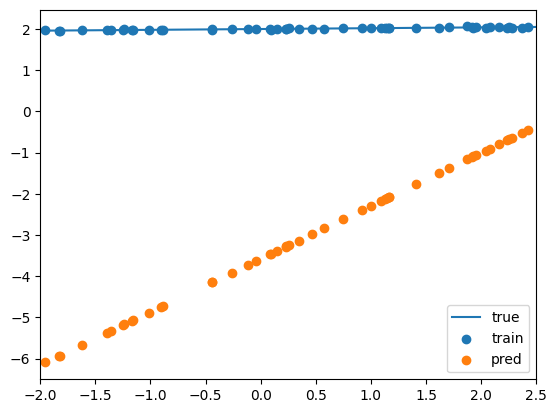

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

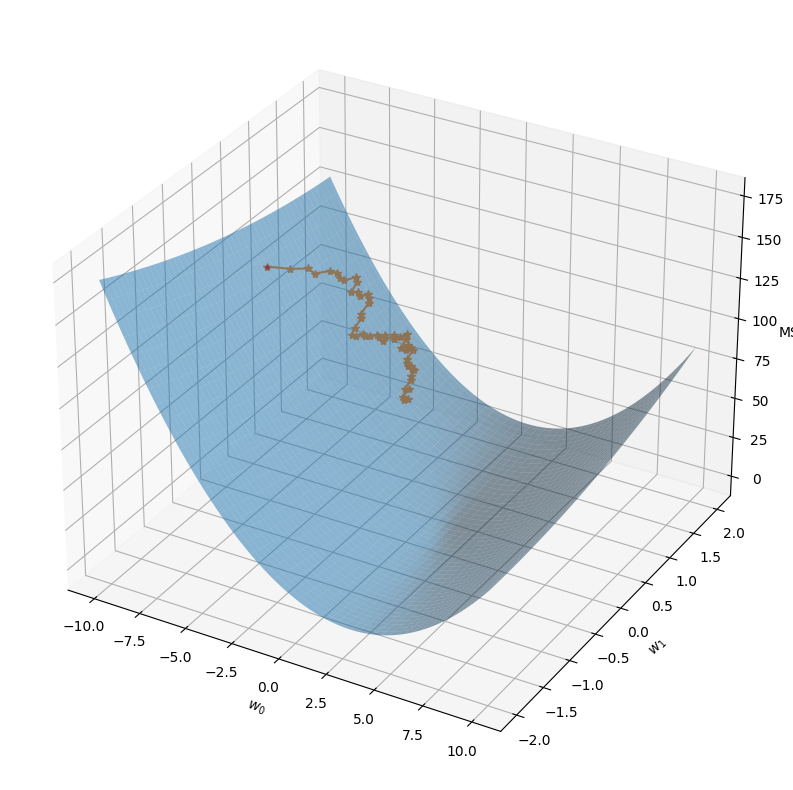

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(rmsprop_sgd_weights_0)):
    mses.append(mse(rmsprop_sgd_weights_0[i], rmsprop_sgd_weights_1[i]))
ax.plot(rmsprop_sgd_weights_0, rmsprop_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

#### Эксперименты с rho

In [ ]:
k = 50
lr = 1


rmsprop_sgd_weights_0_exp = []
rmsprop_sgd_weights_1_exp = []
rhos = np.linspace(0.1, 0.9, 5)

for rho in rhos:
    weights_0, weights_1 = [weight_0], [weight_1]
    alphas = [0, 0]
    eps = 10e-7

    for i in range(k):
        idx = np.random.choice(len(x_train), size=amount, replace=False)
        grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

        alphas[0] = rho * alphas[0] + (1 - rho) * grad[0] ** 2
        alphas[1] = rho * alphas[1] + (1 - rho) * grad[1] ** 2

        lr_k_0 = lr / np.sqrt(alphas[0] + eps)
        lr_k_1 = lr / np.sqrt(alphas[1] + eps)

        new_w_0 = weights_0[-1] - lr_k_0 * grad[0]
        new_w_1 = weights_1[-1] - lr_k_1 * grad[1]

        weights_0.append(new_w_0)
        weights_1.append(new_w_1)

    rmsprop_sgd_weights_0_exp.append(weights_0)
    rmsprop_sgd_weights_1_exp.append(weights_1)

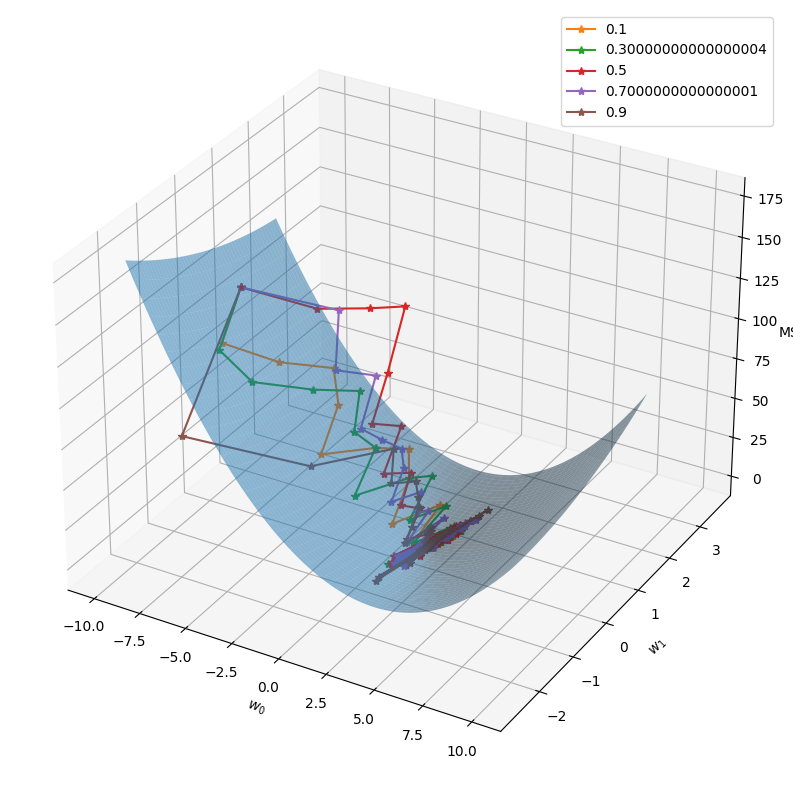

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

for j, (weights_0, weights_1) in enumerate(zip(rmsprop_sgd_weights_0_exp, rmsprop_sgd_weights_1_exp)):
    mses = []
    for i in range(len(weights_0)):
        mses.append(mse(weights_0[i], weights_1[i]))
    ax.plot(weights_0, weights_1, mses, marker='*', label=rhos[j])

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')
plt.legend()
plt.show()

In [ ]:
from keras.optimizers import RMSprop
RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

### Adam (Adaptive Moment Estimation)

<img src='https://i.pinimg.com/736x/7b/58/bb/7b58bb3b853ff61ed8873aeb711cb3b6.jpg'>
Оригинал https://i.pinimg.com/736x/7b/58/bb/7b58bb3b853ff61ed8873aeb711cb3b6.jpg

Здесь соединились два плюса предыдущих оптимизаторов:
1. Импульс (дает сглаживание оптимизации)
2. Постепенное уменьшение скорости обучения

<h4>$V_{k} = \beta_1 * V_{k-1} + g_k$</h4>

<h4>$W_{avg_k} = \beta_2 * W_{avg_{k-1}}+(1-\beta_2){\nabla Q(w^{k-1}, X)}^2$</h4>

Обновление весов:
<h4>$ w^{k} = w^{k-1} - \frac{\eta * V_k}{\sqrt{W_{avg_k} + \epsilon}}$</h4>


#### Алгоритм

1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- Выбираем случайные $x_i$ из X
- $velocity = β_1 * velocity + \nabla f(x_i, w_{k-1}) $

- $\alpha_{avg_k} = β_2 ⋅ \alpha_{avg_{k-1}} + (1 - β_2) \nabla f(x_i, w_{k-1})^2$
- $ w_{k} = w_{k-1} - \frac{\eta ⋅ velocity}{\sqrt{\alpha_{avg_k} + ϵ}} $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


In [ ]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

alphas = [0, 0]
velocity = [0, 0]

eps = 10e-7

b1 = 0.6
b2 = 0.9
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    velocity[0] = b1 * velocity[0] + grad[0]
    velocity[1] = b1 * velocity[1] + grad[1]

    alphas[0] = b2 * alphas[0] + (1 - b2) * grad[0] ** 2
    alphas[1] = b2 * alphas[1] + (1 - b2) * grad[1] ** 2

    new_w_0 = weights_0[-1] - (lr * velocity[0]) / np.sqrt(alphas[0] + eps)
    new_w_1 = weights_1[-1] - (lr * velocity[1]) / np.sqrt(alphas[1] + eps)

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

adam_sgd_weights_0 = weights_0.copy()
adam_sgd_weights_0

[-9,
 -8.68377223734226,
 -8.317610900351356,
 -7.945834538246155,
 -7.587969615410463,
 -7.258439603374557,
 -6.938337178781211,
 -6.63614193260632,
 -6.33892454204093,
 -6.03766014728652,
 -5.755690476296466,
 -5.490126948060384,
 -5.232973947523422,
 -4.976272959529258,
 -4.738312950240874,
 -4.501235611131752,
 -4.262348195436502,
 -4.031242961795086,
 -3.803271650022762,
 -3.592291014986963,
 -3.377776007418181,
 -3.154631439564157,
 -2.9402026808725132,
 -2.7302930307908313,
 -2.525902244554819,
 -2.3289698715018026,
 -2.1284656682887912,
 -1.9356239254655405,
 -1.7581965948685423,
 -1.59773925090099,
 -1.428240108651528,
 -1.2519162943479973,
 -1.0676488858477486,
 -0.9009993041113022,
 -0.7385474628712734,
 -0.5879882510064566,
 -0.4322113347665004,
 -0.28513186222250136,
 -0.13691912728237166,
 0.0022068710695115346,
 0.1417447901528879,
 0.2884465602133912,
 0.422666601869427,
 0.5445327755890813,
 0.670485834389809,
 0.7875045957655742,
 0.9059503308965087,
 1.02267660479002

In [ ]:
adam_sgd_weights_1 = weights_1.copy()
adam_sgd_weights_1

[0.5,
 0.8162277161976608,
 1.1004568886136752,
 1.4372298556954712,
 1.8183223738476153,
 2.2157241734187854,
 2.4108752839862353,
 2.5952403790494145,
 2.6761337102344016,
 2.509583716811512,
 2.2814248415143097,
 2.1273806896804968,
 1.980116892200437,
 1.7981478859953857,
 1.7086844022466128,
 1.672203373048939,
 1.5650347520638084,
 1.4927415837928857,
 1.3722640138531672,
 1.3856335830585134,
 1.3443794937855387,
 1.171470978894265,
 1.074453193946604,
 0.9697932566140557,
 0.9203676386959853,
 0.9408914486234032,
 0.900119190224043,
 0.9205806855783238,
 1.0222082366789171,
 1.2041251861168027,
 1.2768009296455465,
 1.243904367093793,
 1.1109039680994104,
 0.9999088208206923,
 0.9264439135765948,
 0.8672121863657115,
 0.7382189984434979,
 0.6667968340406314,
 0.5974521768007222,
 0.5935817286628228,
 0.5767576744143114,
 0.4902558335292905,
 0.43065377446658193,
 0.4739189060919057,
 0.43428978984139327,
 0.41536149833910346,
 0.3462918957009524,
 0.25230023436401683,
 0.2218727

In [ ]:
pred = weights_0[-1] + weights_1[-1] * x_train

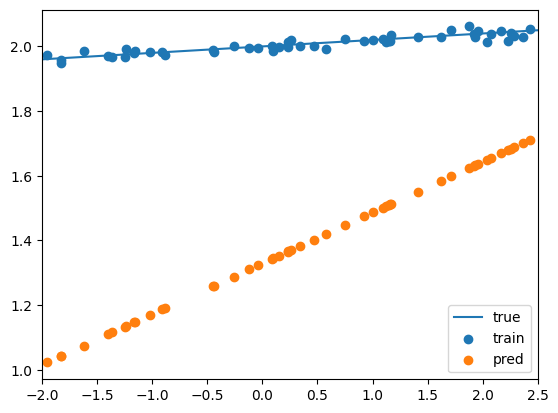

In [ ]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

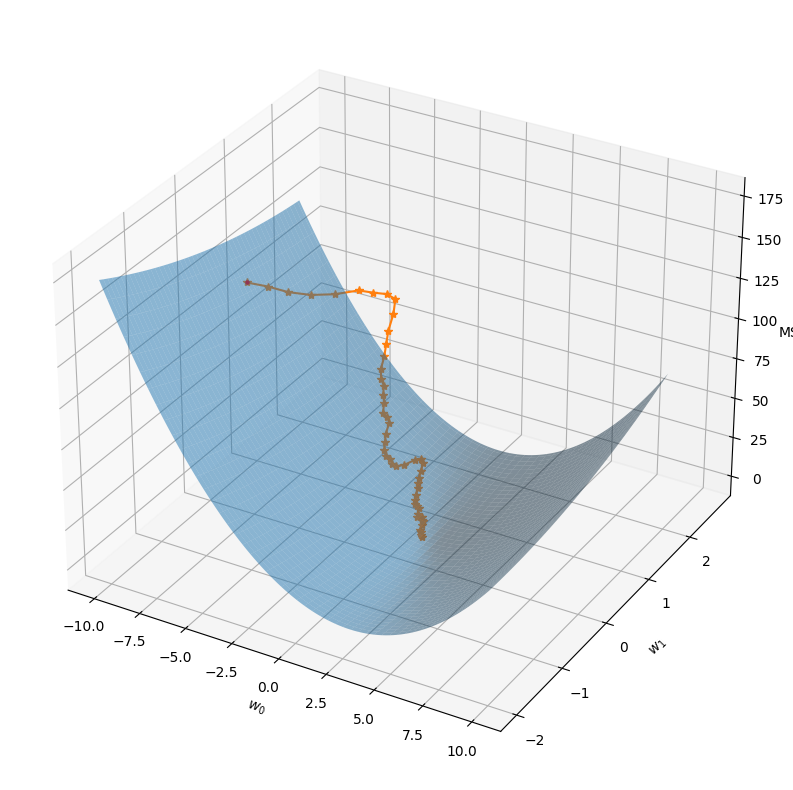

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(adam_sgd_weights_0)):
    mses.append(mse(adam_sgd_weights_0[i], adam_sgd_weights_1[i]))
ax.plot(adam_sgd_weights_0, adam_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

In [ ]:
from keras.optimizers import Adam
Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

## Пример на данных

Получение данных

Описание датасета:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, X_test.shape

57026/57026 [==============================] - 0s 0us/step


((404, 13), (102, 13))

In [ ]:
X_train[:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

Масштабирование данных

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

mean, std

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [ ]:
X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

In [ ]:
X_train.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
       -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
        6.13920356e-16])

In [ ]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Архитектура сети


Определение сети через класс Sequential и добавление слоев в него через add

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

### Обучение сети

In [ ]:
import keras
keras.utils.set_random_seed(1)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.layers[0].get_weights()[0][0]

array([-0.17600164,  0.2646938 ,  0.32016253, -0.11448252, -0.34217083,
       -0.28456724,  0.03290179, -0.3531145 ,  0.21653193, -0.15907353,
        0.10730779, -0.2749906 ,  0.08790419, -0.10920227,  0.02119857,
       -0.30589145, -0.14223927,  0.00555247,  0.33767045, -0.17586714,
       -0.2734608 , -0.08977506,  0.09206462,  0.30506545,  0.15165645,
       -0.19423014,  0.280748  , -0.17011668, -0.2351049 , -0.22945108,
       -0.30746546,  0.17588419], dtype=float32)

Epoch 1/4
13/13 [==============================] - 0s 6ms/step - loss: 458.1909 - mae: 19.3421 - val_loss: 406.4101 - val_mae: 18.1097
Epoch 2/4
13/13 [==============================] - 0s 4ms/step - loss: 224.1864 - mae: 12.5408 - val_loss: 96.8045 - val_mae: 7.9823
Epoch 3/4
13/13 [==============================] - 0s 5ms/step - loss: 66.5055 - mae: 5.8551 - val_loss: 119.6857 - val_mae: 8.9477
Epoch 4/4
13/13 [==============================] - 0s 4ms/step - loss: 34.7029 - mae: 4.2372 - val_loss: 188.7501 - val_mae: 11.4795
Epoch 1/4
13/13 [==============================] - 0s 10ms/step - loss: 540.4097 - mae: 21.4638 - val_loss: 506.9121 - val_mae: 20.7910
Epoch 2/4
13/13 [==============================] - 0s 5ms/step - loss: 439.0104 - mae: 19.1251 - val_loss: 399.7414 - val_mae: 18.2831
Epoch 3/4
13/13 [==============================] - 0s 6ms/step - loss: 335.8510 - mae: 16.5611 - val_loss: 297.8584 - val_mae: 15.5272
Epoch 4/4
13/13 [==============================] - 0s 4ms/ste

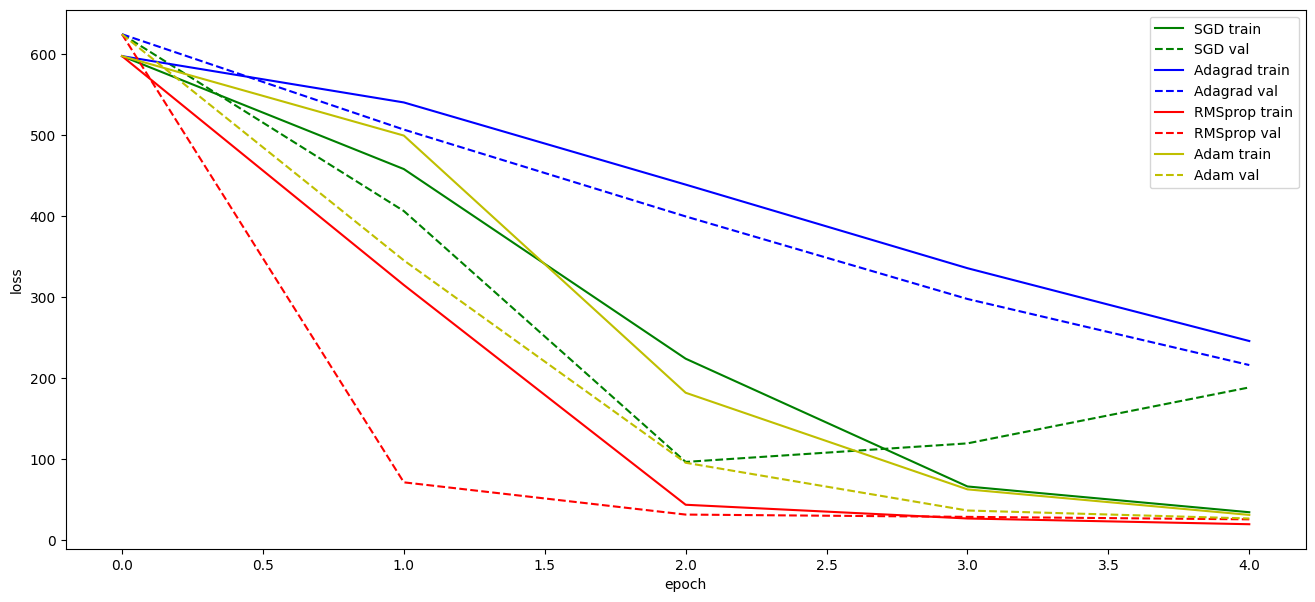

CPU times: user 4.26 s, sys: 191 ms, total: 4.45 s
Wall time: 4.83 s


In [ ]:
%%time

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 4
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([SGD(learning_rate=0.01),
                             Adagrad(learning_rate=0.01),
                             RMSprop(learning_rate=0.01),
                             Adam(learning_rate=0.01)]):

    # создаем рабочую модель  model с зафиксированными весами
    keras.utils.set_random_seed(1)

    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1], )))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # компилируем model с одним из оптимизаторов
    model.compile(optimizer=i_optim, loss='mse', metrics=['mae'])

    # вычисляем ошибку для model без обучения
    h0_train = model.evaluate(X_train, y_train, verbose=0)
    h0_val = model.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели
    h = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model

    # картинки
    plt.plot(epoch, [h0_train[0]] + h.history['loss'], '-', c=colors[i],
             label=model.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, [h0_val[0]] + h.history['val_loss'], '--', c=colors[i],
             label=model.optimizer.get_config()['name'] + ' val')
    print('=' * 20)

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Summary


Вот мы и разобрались:
1. Какие есть оптимизаторы
2. Особенности SGD, Momentum, AdaGrad, RMSProp, Adam
3. Преимущества и недостатки

<table>
<tr>
<th>
Оптимизаторы
</th>

<th>
Плюсы
</th>

<th>
Минусы
</th>
</tr>

<tr>
<td>
Gradient Descent
</td>

<td>

        1. Легко реализовать
</td>

<td>

        1. Одна итерация длится долго
        2. Требователен к памяти
</td>
</tr>


<tr>
<td>
Stochastic Gradient Descent

</td>

<td>

        1. Много обновление весов
        2. Требует меньше памяти
        3. Можно использовать большие датасеты
        4. Случайность может помочь перепрыгнуть локальные минимумы

</td>

<td>

        1. Частые обновления весов могут вносит шум
        2. Случайность может увести не туда

</td>
</tr>

<tr>
<td>
SGD + Momentum

</td>

<td>

        1. Импульс сглаживает схождение
</td>

<td>

        1. Дополнительный параметр

</td>
</tr>

<tr>
<td>
AdaGrad
</td>

<td>

        1. Адаптивное изменение скорости обучения
    
</td>

<td>

        1. Скорость обучения может стать слишком маленькой
</td>
</tr>

<tr>
<td>
RMSProp
</td>

<td>

        1. Адаптивное изменение скорости обучения

</td>

<td>

        1. Может быть медленное схождение
</td>
</tr>

<tr>
<td>
Adam
</td>

<td>

        1. Адаптивное изменение скорости обучения
        2. Импульс сглаживает схождение
</td>

<td>

        1. Дополнительные параметры
</td>
</tr>

</table>


<img src='https://i0.wp.com/blog-cdn.ineuron.ai/user/uploads/777323856e548c565763e4046d7fd064.png?w=750&ssl=1'>